# Proyek Analisis Data: Brazilian E-Commerce Public


## Menentukan Pertanyaan Bisnis

- Seberapa besar persentase pelanggan yang memberikan ulasan dengan rating 1-2 bintang dibandingkan rating 4-5 bintang, untuk kategori produk tertentu?
- bagaimana perbandingan metode pembayaran?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- yang saya pakai hanya 2 ini saja 
- order_reviews_df
- order_payments_df

### Assessing Data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [22]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

print("Jumlah duplikasi: ", products_df.duplicated().sum())

In [24]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [25]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- pada orders_review_df terdapat kolom yang null yaitu review_comment_title dan review_comment_message. tapi ini tidak menggangu data karena banyak orang yang hanya ngasih rating bintang saja tanpa memberi komen/pesan apapun. dan juga ada tipe data yang tidak sesuai.
- pada order_payments_df sudah lengkap tidak ada nilai null, dan tipe data sudah sesuai.

### Cleaning Data

- order_reviews_df: kesalahan tipe data di kolom review_creation_date, review_answer_timestamp


In [26]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- mengkonversi tipe data menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [29]:
order_reviews_df.groupby(by='review_score').agg({
    'review_id': 'count',
    'review_score': 'mean'
})

,review_id,review_score
review_score,,
1,11424,1.0
2,3151,2.0
3,8179,3.0
4,19142,4.0
5,57328,5.0


In [30]:
order_payments_df.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

**Insight:**
- perbandingan review score lebih banyak untuk bintang 4-5 dibanding 1-2. banyak pelanggan lebih puas
- kartu kredit mendominasi berarti pelanggan lebih banyak menggunakan kartu kredit

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar persentase pelanggan yang memberikan ulasan dengan rating 1-2 bintang dibandingkan rating 4-5 bintang, untuk kategori produk tertentu?

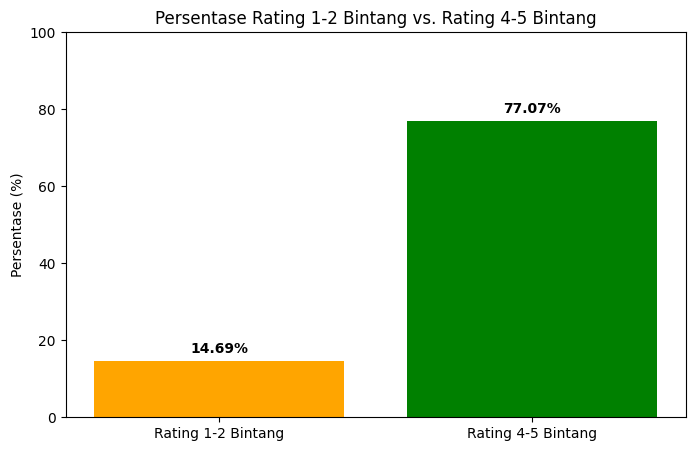

In [31]:
review_counts = order_reviews_df['review_score'].value_counts().sort_index()
count_1_2 = review_counts.loc[1:2].sum()
count_4_5 = review_counts.loc[4:5].sum()

total_count = review_counts.sum()

percentage_1_2 = (count_1_2 / total_count) * 100
percentage_4_5 = (count_4_5 / total_count) * 100

percentages = [percentage_1_2, percentage_4_5]
labels = ['Rating 1-2 Bintang', 'Rating 4-5 Bintang']

plt.figure(figsize=(8, 5))
plt.bar(labels, percentages, color=['orange', 'green'])
plt.ylabel('Persentase (%)')
plt.title('Persentase Rating 1-2 Bintang vs. Rating 4-5 Bintang')
plt.ylim(0, 100)
for i, v in enumerate(percentages):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', fontweight='bold')
plt.show()

### Pertanyaan 2: bagaimana perbandingan metode pembayaran?

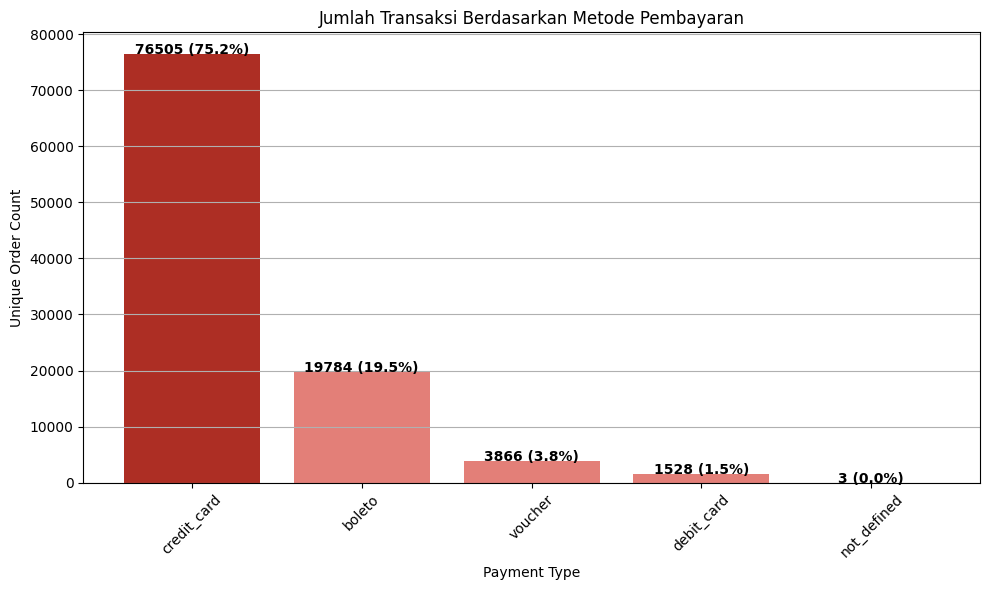

In [32]:
payment_counts = order_payments_df.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)

payment_counts = payment_counts.reset_index()
payment_counts.columns = ['Payment Type', 'Unique Order Count']

total_orders = payment_counts['Unique Order Count'].sum()

payment_counts['Percentage'] = (payment_counts['Unique Order Count'] / total_orders) * 100

plt.figure(figsize=(10, 6))
plt.bar(payment_counts['Payment Type'], payment_counts['Unique Order Count'], color=["#AD2E24", "#E37F78", "#E37F78", "#E37F78", "#E37F78"])
plt.title("Jumlah Transaksi Berdasarkan Metode Pembayaran")
plt.xlabel('Payment Type')
plt.ylabel('Unique Order Count')
plt.xticks(rotation=45)

plt.grid(axis='y')

for i,v in enumerate(payment_counts['Unique Order Count']):
    plt.text(i, v + 0.2, f"{v} ({payment_counts['Percentage'].iloc[i]:.1f}%)", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**
- persentase untuk rating 1-2 jauh sekali dengan rating 4-5 perbandingannya 62.38%
- untuk tipe pembayaran terbanyak menggunakan kartu kredit sebesar 75.2%

## Conclusion

- Persentase rating rendah (1-2) menunjukkan ketidakpuasan pelanggan. Persentase yang lebih tinggi dalam kategori ini dapat mengindikasikan masalah pada kualitas produk, pengiriman layanan, atau harapan pelanggan yang tidak terpenuhi. Sebaliknya, persentase rating tinggi (4-5) mencerminkan kepuasan dan loyalitas pelanggan. Proporsi rating tinggi yang signifikan menunjukkan bahwa pelanggan puas dengan pembelian mereka dan cenderung merekomendasikan produk atau layanan kepada orang lain.


- Visualisasi menjelaskan bahwa pembayaran menggunakan kartu kredit adalah yang paling dominan, menunjukkan preferensi yang kuat di antara konsumen terhadap metode ini

In [33]:
all_df = pd.merge(
    left=order_reviews_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()
    

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1.0,credit_card,8.0,397.26
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1.0,credit_card,1.0,88.09
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1.0,credit_card,1.0,194.12
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,credit_card,1.0,222.84
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,credit_card,10.0,1333.25


In [34]:
all_df.to_csv("all_data.csv", index=False)